# **Libraries, Dataset, Describe**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('dshouse.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   TipeRumah           99 non-null     int64
 1   Lantai              99 non-null     int64
 2   KamarTidur          99 non-null     int64
 3   KamarMandi          99 non-null     int64
 4   Listrik             99 non-null     int64
 5   FasilitasPerumahan  99 non-null     int64
 6   carpot              99 non-null     int64
 7   harga               99 non-null     int64
 8   Universitas         99 non-null     int64
 9   TransportasiUmum    99 non-null     int64
 10  Perkantoran         99 non-null     int64
 11  Market              99 non-null     int64
 12  AksesToll           99 non-null     int64
 13  Security            99 non-null     int64
dtypes: int64(14)
memory usage: 11.0 KB


In [ ]:
df.head()

,TipeRumah,Lantai,KamarTidur,KamarMandi,Listrik,FasilitasPerumahan,carpot,harga,Universitas,TransportasiUmum,Perkantoran,Market,AksesToll,Security
0,5,1,1,1,1300,4,1,595737000,6,2,7,7,4,1
1,5,1,1,1,1300,4,1,767787000,6,2,7,7,4,1
2,5,1,1,1,1300,4,1,771783000,6,2,7,7,4,1
3,5,1,2,1,1300,4,1,665310700,6,2,7,7,4,1
4,6,1,1,1,1300,4,1,878232000,6,2,7,7,4,1


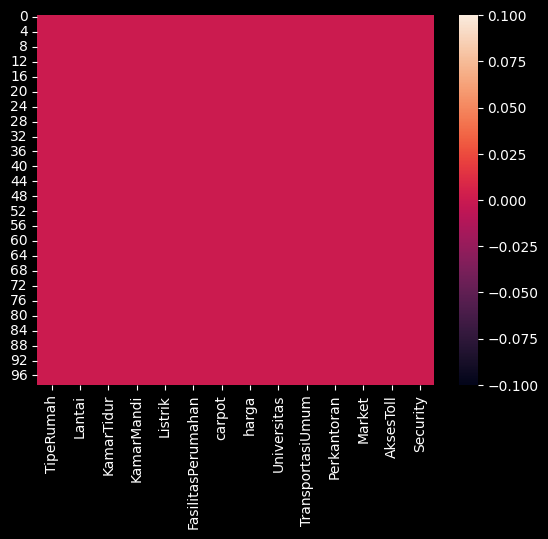

In [ ]:
sns.heatmap(df.isnull())
plt.style.use("dark_background")
color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)

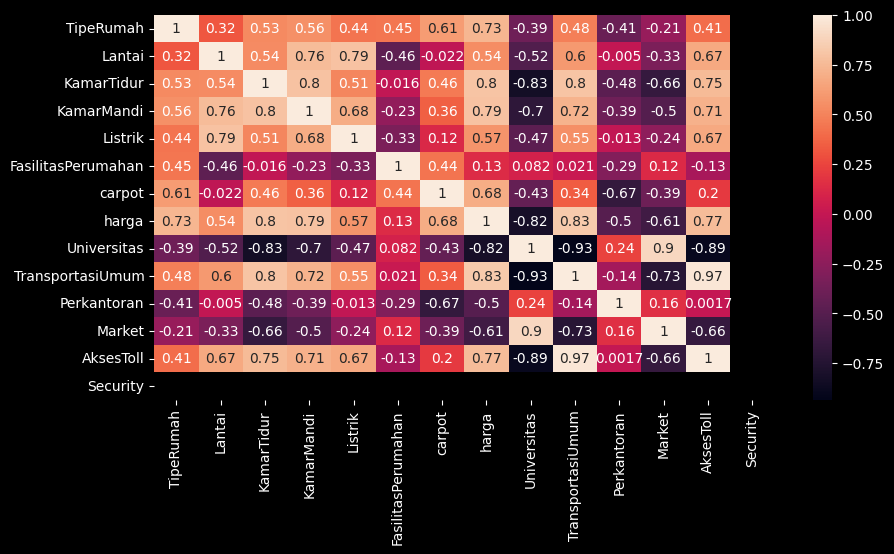

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.style.use("dark_background")

# **Jumlah Rumah berdasarkan Tipe Rumah**

In [ ]:
TipeRumah = df.groupby("TipeRumah").count()[['Lantai']].sort_values(by='Lantai', ascending=True).reset_index()
TipeRumah = TipeRumah.rename(columns={'Lantai':'JumlahRumah'})

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '5'),
  Text(1, 0, '6'),
  Text(2, 0, '7'),
  Text(3, 0, '8'),
  Text(4, 0, '9'),
  Text(5, 0, '10'),
  Text(6, 0, '11'),
  Text(7, 0, '12')])

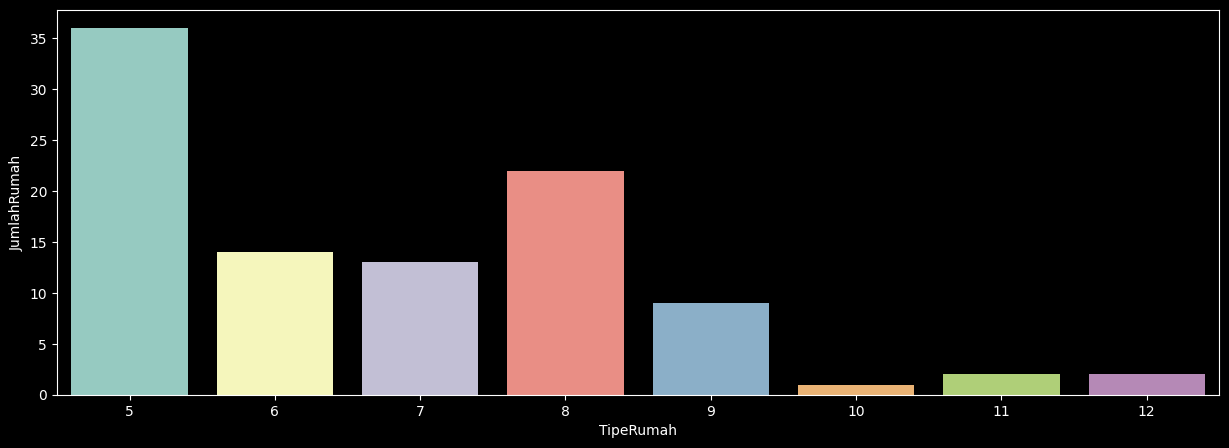

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=TipeRumah['TipeRumah'], y=TipeRumah['JumlahRumah'])
plt.xticks(rotation=0)

# **Jumlah Rumah Berdasarkan Lantai Rumah**

In [ ]:
floor = df.groupby("Lantai").count()[['TipeRumah']].sort_values(by='TipeRumah', ascending=True).reset_index()
floor = floor.rename(columns={'TipeRumah':'count'})

<Axes: xlabel='Lantai', ylabel='count'>

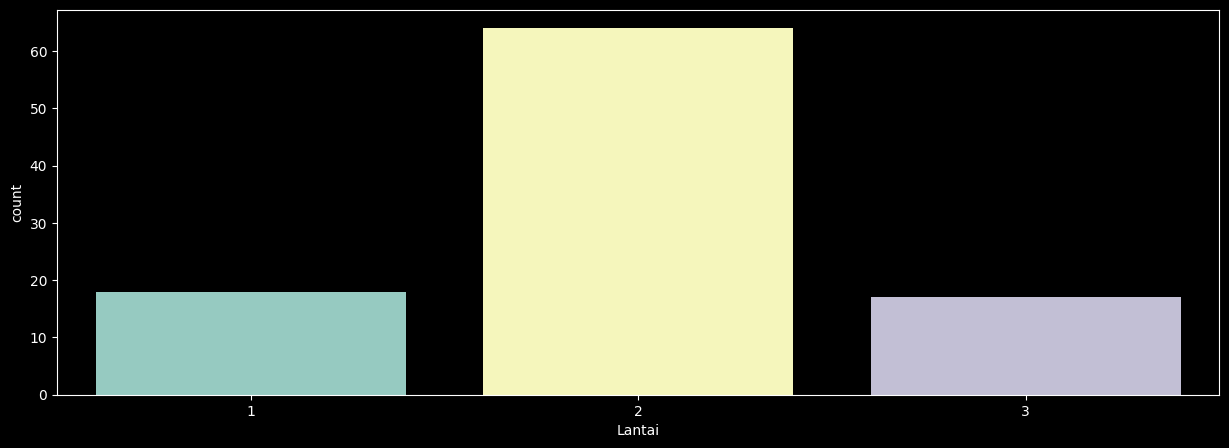

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=floor['Lantai'], y=floor['count'])

# **Tipe Rumah berdasarkan Luas Bangunan**

In [ ]:
models = df.groupby("TipeRumah").count()[['Lantai']].sort_values(by='Lantai', ascending=True).reset_index()
models = models.rename(columns={'Lantai':'JumlahRumah'})

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '5'),
  Text(1, 0, '6'),
  Text(2, 0, '7'),
  Text(3, 0, '8'),
  Text(4, 0, '9'),
  Text(5, 0, '10'),
  Text(6, 0, '11'),
  Text(7, 0, '12')])

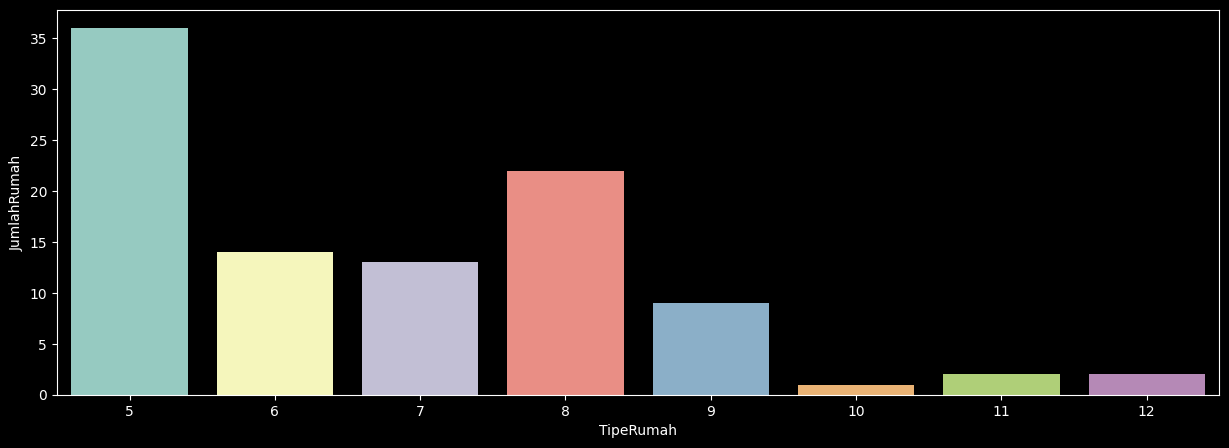

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['TipeRumah'], y=models['JumlahRumah'])
plt.xticks(rotation=0)

# **Feature Selection**

In [ ]:
features = ['TipeRumah', 'Lantai', 'KamarTidur', 'KamarMandi', 'carpot']
x = df[features]
y = df['harga']
x.shape, y.shape

((99, 5), (99,))

# **Split Data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
y_test.shape

(25,)

# **LINEAR Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split Data > features (X) and target (y)
x = df.drop('harga', axis=1)
y = df['harga']

# Split Data > Train/Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# linear Regression Train Model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict Data Test
y_pred = model.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error: 230347019002394176.00
R-squared (R2) Score: 0.84


In [ ]:
lm = LinearRegression()

In [ ]:
# Train Model Train Sets
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Value of y intercept
lm.intercept_

1753493401.1664891

In [ ]:
# Predict Train Data
y_pred = lm.predict(x_train)

In [ ]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9636615936283692
Adjusted R^2: 0.956393912354043
MAE: 208055118.34593326
MSE: 7.130409961348118e+16
RMSE: 267028274.9326018


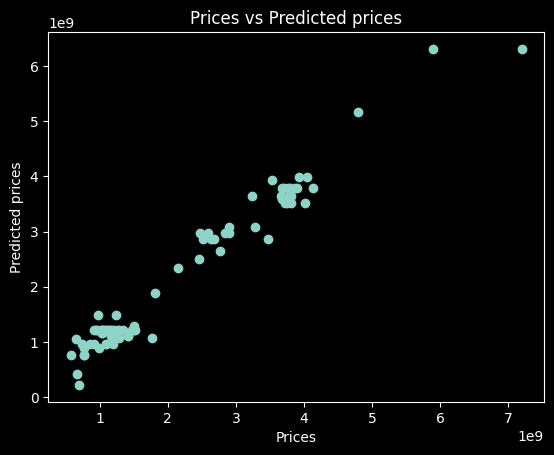

In [ ]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
# Predicting Test Data
y_test_pred = lm.predict(x_test)

# Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
mae_linreg = metrics.mean_absolute_error(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8361435669413935
Adjusted R^2: 0.4811212953144127
MAE: 384507301.82989216
MSE: 2.3034701900239418e+17
RMSE: 479944808.2877803


# **`XGBOOST Regression`**

In [ ]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train model use Train Sets
reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Prediction Model
y_pred = reg.predict(x_train)

In [ ]:
# Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9813013163348338
Adjusted R^2: 0.9775615796018005
MAE: 130131287.10126582
MSE: 3.6691009205700504e+16
RMSE: 191548973.38722676


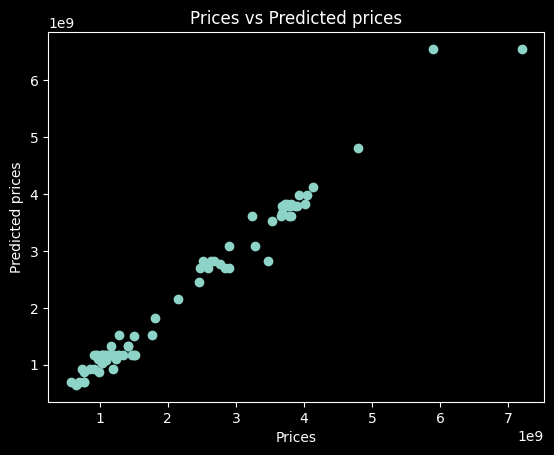

In [ ]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
#Predicting Test Data
y_test_pred = reg.predict(x_test)

In [ ]:
# Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)

print('R^2:', acc_xgb)
mae_xgb = metrics.mean_absolute_error(y_test, y_test_pred)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8916266135102711
Adjusted R^2: 0.6568176094491918
MAE: 298083551.55
MSE: 1.5234974941859437e+17
RMSE: 390320060.23082435


# **COMPARISION Models**

In [ ]:
models = pd.DataFrame({'Model': ['Linear Regression', 'XGBoost Regressor'], 'R-squared Score': [acc_linreg*100, acc_xgb*100], 'MAE score': [mae_linreg, mae_xgb] })
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score,MAE score
1,XGBoost Regressor,89.162661,2.980836e+08
0,Linear Regression,83.614357,3.845073e+08


In [ ]:
models = pd.DataFrame({'Model': ['Linear Regression', 'XGBoost Regressor'], 'R-squared Score': [acc_linreg*100, acc_xgb*100], 'MAE score': [mae_linreg, mae_xgb]})
models.sort_values(by= 'MAE score', ascending=True)

,Model,R-squared Score,MAE score
1,XGBoost Regressor,89.162661,2.980836e+08
0,Linear Regression,83.614357,3.845073e+08


In [ ]:
models

,Model,R-squared Score,MAE score
0,Linear Regression,83.614357,3.845073e+08
1,XGBoost Regressor,89.162661,2.980836e+08


# ***Score PREDICT***

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [ ]:
score = lr.score(x_test, y_test)
print('Accuration LR = ', score)

Accuration LR =  0.8361435669413935


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = model.predict(x_test)

# Mengukur performa model menggunakan metrik-metrik regresi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil skor
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 1.5234974941859437e+17
Mean Absolute Error (MAE): 298083551.55
R-squared (R2): 0.8916266135102711


# **Model Predict Estimate House Price**


In [ ]:
# Pilih fitur dan target
features = ['TipeRumah', 'Lantai', 'KamarTidur', 'KamarMandi', 'carpot']
x = df[features]
y = df['harga']

# Membuat dan melatih model XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(x, y)

# Input array yang digunakan dari Dataset
input_data = np.array([[8, 2, 3, 3, 2]])

# Melakukan prediksi menggunakan model yang telah dilatih
prediction = model.predict(input_data)

# Menampilkan hasil prediksi
print("Jumlah fitur yang digunakan oleh model:", len(model.feature_importances_))
print('Estimate Price: {:.2f}'.format(prediction[0]))

Jumlah fitur yang digunakan oleh model: 5
Estimate Price: 3459709696.00
